In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'c:\\Users\\Max\\Desktop\\Python\\Ciencia de Datos\\Libro_Introduction_to_DataScience\\introduction-datascience-python-book\\JN_Propios'

In [3]:
pat = r'c:\Users\Max\Desktop\Python\Ciencia de Datos\Libro_Introduction_to_DataScience\introduction-datascience-python-book'
os.chdir(pat)

In [4]:
edu = pd.read_csv(r'.\files\ch02\educ_figdp_1_Data.csv',
na_values = ':',
usecols = ["TIME","GEO","Value"])
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [5]:
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [6]:
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [7]:
print(edu.index)
print(edu.columns)

RangeIndex(start=0, stop=384, step=1)
Index(['TIME', 'GEO', 'Value'], dtype='object')


In [8]:
edu.values

array([[2000, 'European Union (28 countries)', nan],
       [2001, 'European Union (28 countries)', nan],
       [2002, 'European Union (28 countries)', 5.0],
       ...,
       [2009, 'Finland', 6.81],
       [2010, 'Finland', 6.85],
       [2011, 'Finland', 6.76]], dtype=object)

In [9]:
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [10]:
edu['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

In [11]:
edu[10:14]
# Note that the slice does not use the index labels as references, but the position.

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


In [12]:
edu.loc[90:94, ['TIME','GEO']]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


In [13]:
edu[edu['Value'] > 6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Pandas uses the special value NaN (not a number) to represent missing values. In Python, NaN is a special floating-point value returned by certain operations when one of their results ends in an undefined value. A subtle feature of NaN values is that two NaN are never equal. Because of this, the only safe way to tell whether a value is missing in a DataFrame is by using the isnull() function.

In [14]:
edu[edu["Value"].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


In [15]:
edu. max(axis = 0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

In [16]:
print ("Pandas max function:", edu['Value']. max ())
print( "Python max function:", max(edu['Value']))
# Las funciones de Python toman NaN como un valor mientras Pandas no

Pandas max function: 8.81
Python max function: nan


In [17]:
s = edu["Value" ]/100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

However, we can apply any function to a DataFrame or Series just setting its name as argument of the apply method. For example, in the following code, we apply the sqrt function from the NumPy library to perform the square root of each value in the Value column.

In [18]:
s = edu["Value"].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

In [19]:
s = edu["Value"]. apply ( lambda d: d**2)
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

In [20]:
edu['ValueNorm'] = edu['Value']/edu['Value']. max ()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


In [21]:
edu.drop('ValueNorm', axis = 1, inplace = True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [22]:
s = pd.DataFrame.from_dict({"TIME": [2000],"Value": [5.00],"GEO": ['A']})
s

,TIME,Value,GEO
0,2000,5.0,A


In [23]:
edu = pd.concat([edu,s],axis=0,ignore_index=True)
edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,A,5.00


In [24]:
edu.drop(max(edu.index), axis = 0, inplace = True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [25]:
filtered_data = edu[edu["TIME"] > 2005]
pivedu = pd.pivot_table(filtered_data, values = 'Value',
                        index = ['GEO'] ,
                        columns = ['TIME'])
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [26]:
# Interesante
edu[edu['GEO'].str.endswith('land')]

,TIME,GEO,Value
156,2000,Ireland,4.29
157,2001,Ireland,4.24
158,2002,Ireland,4.27
159,2003,Ireland,4.35
160,2004,Ireland,4.66
161,2005,Ireland,4.72
162,2006,Ireland,4.73
163,2007,Ireland,4.92
164,2008,Ireland,5.67
165,2009,Ireland,6.43


In [27]:
pivedu.loc[['Spain','Portugal'], [2006,2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


In [28]:
pivedu = pivedu.drop(['Euro area (13 countries)',
                    'Euro area (15 countries)',
                    'Euro area (17 countries)',
                    'Euro area (18 countries)',
                    'European Union (25 countries)',
                    'European Union (27 countries)',
                    'European Union (28 countries)'] ,axis = 0)

pivedu = pivedu.rename(index = {'Germany (until 1990 former territory of the FRG)': 'Germany'})
pivedu = pivedu.dropna()
pivedu.rank(ascending = False, method = 'first').head()


TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


In [29]:
totalSum = pivedu.sum(axis=1)
totalSum.rank(ascending=False, method='dense').sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

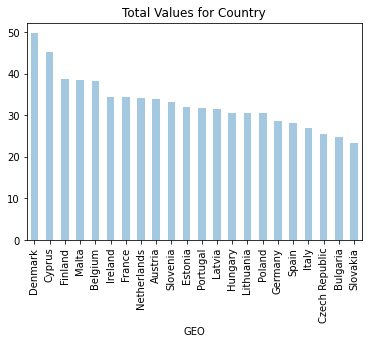

In [30]:
totalSum = pivedu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind='bar', style='b', alpha=0.4,
              title = "Total Values for Country");


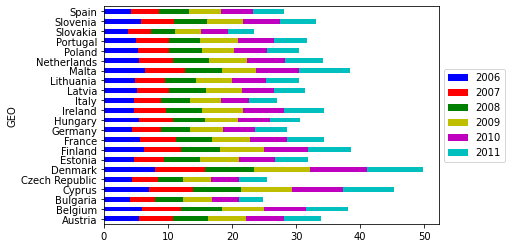

In [31]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu.plot(kind='barh', stacked=True, color=my_colors)
ax.legend(loc='center left', bbox_to_anchor=(1,.5));

In [32]:
# trigrams
nombre = "Leydi Johana Osorio Vargas"
trigrams3 = []
nombre = nombre.replace(' ','')
for grams in range(len(nombre)-3):
    trigrams3.append(nombre[grams:grams+3])
    
trigrams3

['Ley',
 'eyd',
 'ydi',
 'diJ',
 'iJo',
 'Joh',
 'oha',
 'han',
 'ana',
 'naO',
 'aOs',
 'Oso',
 'sor',
 'ori',
 'rio',
 'ioV',
 'oVa',
 'Var',
 'arg',
 'rga']

# Descriptive Statistics

## Data Preparation

In [46]:
file = open('files/ch03/adult.data', 'r')

def chr_int(a):

    if a.isdigit():
        return int(a)

    else :
        return 0


data = []

for line in file:

    data1 = line.split(', ')

    if len(data1) == 15:

        data.append([
                    chr_int(data1[0]), data1[1],
                    chr_int(data1[2]), data1[3],
                    chr_int(data1[4]), data1[5],
                    data1[6], data1[7], data1[8],
                    data1[9], chr_int(data1[10]),
                    chr_int(data1[11]),
                    chr_int(data1[12]),
                    data1 [13], data1[14].strip('\n')
                    ])

In [48]:
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K']]


In [49]:
df = pd.DataFrame( data)
df.columns = [
             'age', 'type_employer', 'fnlwgt',
             'education', 'education_num', 'marital',
             'occupation',' relationship', 'race',
             'sex', 'capital_gain', 'capital_loss',
             'hr_per__week', 'country', 'income'
              ]

In [50]:
df.shape

(32561, 15)

In [51]:
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per__week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
counts = df.groupby('country').size()
print(counts.head())

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


In [54]:
ml = df[(df.sex=='Male')]

In [56]:
ml1 = df[(df.sex == 'Male') & (df.income== '>50K')]
fm = df[(df.sex == 'Female')]
fm1 = df[(df.sex == 'Female') & (df.income== '>50K') ]

# Exploratory Data Analysis

## Summarizing the Data

In [59]:
df1 = df[(df.income== '>50K') ]
print('The rate of people with high income is: ', int( len(df1)/ float ( len(df))*100), '%.')
print( 'The rate of men with high income is: ', int( len(ml1)/ float ( len(ml))*100), '%.')
print( 'The rate of women with high income is: ', int( len(fm1)/ float ( len(fm))*100), '%.')

The rate of people with high income is:  24 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


In [61]:
print( 'The average age of men is: ', ml['age'].mean())
print( 'The average age of women is: ', fm['age'].mean())
print( 'The average age of high - income men is: ', ml1['age'].mean())
print( 'The average age of high - income women is: ', fm1['age'].mean())

The average age of men is:  39.43354749885268
The average age of women is:  36.85823043357163
The average age of high - income men is:  44.62578805163614
The average age of high - income women is:  42.125530110262936


In [63]:
ml_mu = ml['age'].mean()
fm_mu = fm['age'].mean()
ml_var = ml['age'].var()
fm_var = fm['age'].var()
ml_std = ml['age'].std()
fm_std = fm['age'].std()
print('Statistics of age for men: mu:', ml_mu , 'var:', ml_var , 'std:', ml_std)
print('Statistics of age for women: mu:', fm_mu , 'var:', fm_var , 'std:', fm_std)

Statistics of age for men: mu: 39.43354749885268 var: 178.77375174529985 std: 13.370630192526448
Statistics of age for women: mu: 36.85823043357163 var: 196.3837063948063 std: 14.013697099438332


In [65]:
ml_median = ml['age'].median()
fm_median = fm['age'].median()
print("Median age per men and women: ",
      ml_median , fm_median)

ml_median_age = ml1['age'].median()
fm_median_age = fm1['age'].median()
print("Median age per men and women with high - income: ",
      ml_median_age , fm_median_age)

Median age per men and women:  38.0 35.0
Median age per men and women with high - income:  44.0 41.0


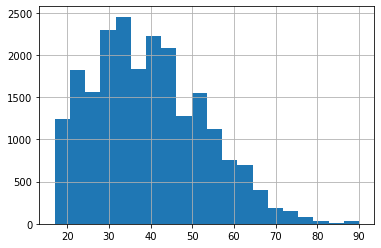

In [68]:
ml_age = ml['age']
ml_age.hist(histtype = 'stepfilled',
            bins = 20);

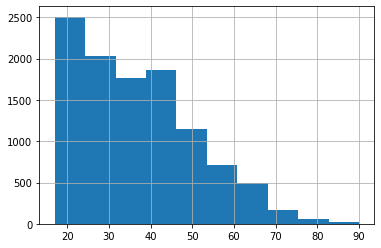

In [70]:
fm_age = fm['age']
fm_age.hist(histtype = 'stepfilled',
            bins = 10);

''

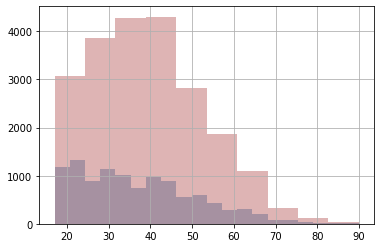

In [76]:
import seaborn as sns

fm_age.hist(
            histtype = 'stepfilled',
            alpha = .5, bins = 20
            )

ml_age.hist(
            histtype = 'stepfilled',
            alpha = .5,
            color = sns.desaturate("indianred",
            .75),
            bins = 10)
;

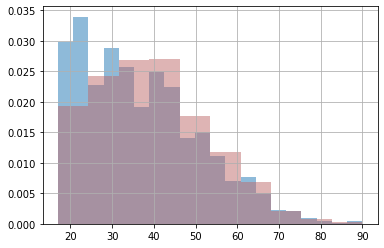

In [98]:
fm_age.hist(
            density = True,
            histtype = 'stepfilled',
            alpha = .5, bins = 20
            )

ml_age.hist(
            density=True,
            histtype = 'stepfilled',
            alpha = .5,
            color = sns.desaturate("indianred",
            .75),
            bins = 10);

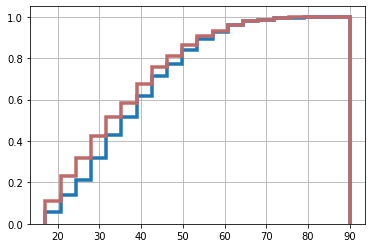

In [97]:
ml_age.hist(
            density=True, histtype='step',
            cumulative=True, linewidth=3.5,
            bins=20
            )

fm_age.hist(
            density=True, histtype='step',
            cumulative=True, linewidth=3.5,
            bins=20, color=sns.desaturate("indianred",
            .75)
            );


In [101]:
# La construcción de este algoritmo está mal diseñado

df2 = df.drop(
             df.index[(df.income == '>50K')
             & (df['age'] > df['age'].median() + 35)
             & (df['age'] > df['age'].median() - 15)
             ])

ml1_age = ml1['age']
fm1_age = fm1['age']

ml2_age = ml1_age.drop(
                       ml1_age.index[(ml1_age > df['age'].median() + 35)
                       & (ml1_age > df['age'].median() - 15)
                       ])

fm2_age = fm1_age.drop(
                       fm1_age.index[(fm1_age > df['age'].median() + 35)
                       & (fm1_age > df['age'].median() - 15)
                       ])

# Están quitando que sean mayores de 15 Y de 72. Los únicos datos que cumplen
# esta condición son los que están por encima de 72

In [102]:
mu2ml = ml2_age.mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()
mu2fm = fm2_age.mean()
std2fm = fm2_age.std()
md2fm = fm2_age.median()
print("Men statistics:")
print("Mean:", mu2ml , "Std:", std2ml)
print("Median:", md2ml)
print("Min:", ml2_age. min (), "Max:", ml2_age.max ())
print("Women statistics:")
print("Mean:", mu2fm , "Std:", std2fm)
print("Median:", md2fm)
print("Min:", fm2_age. min (), "Max:", fm2_age.max ())

Men statistics:
Mean: 44.317982123920615 Std: 10.019749857171409
Median: 44.0
Min: 19 Max: 72
Women statistics:
Mean: 41.877028181041844 Std: 10.036441807343707
Median: 41.0
Min: 19 Max: 72


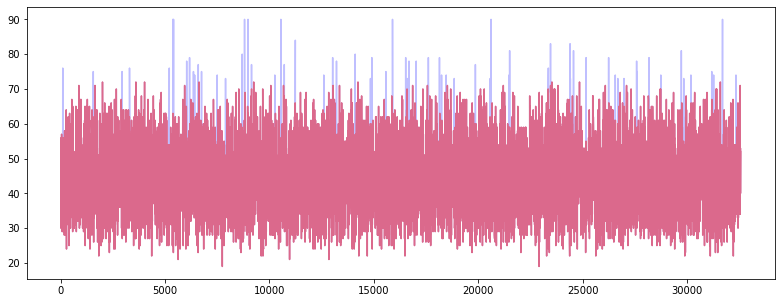

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13.4, 5))
df.age[(df.income == '>50K') ].plot(alpha = .25, color = 'blue')
df2.age[(df2.income == '>50K')].plot(alpha = .45, color = 'red');

In [110]:
print ('The mean difference with outliers is: %4.2f.'% (ml_age.mean() - fm_age.mean()))
print( 'The mean difference without outliers is: %4.2f.'% (ml2_age. mean() - fm2_age. mean()))

The mean difference with outliers is: 2.58.
The mean difference without outliers is: 2.44.


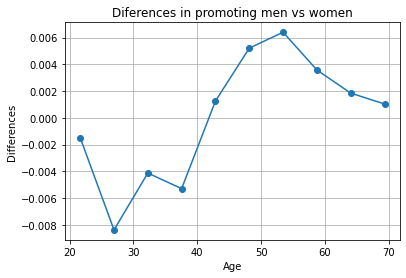

In [140]:
countx , divisionx = np.histogram(ml2_age, density=True)
county , divisiony = np.histogram(fm2_age , density =True)
val = [(divisionx[i] + divisionx[i +1])/2 for i in range(len(divisionx) - 1)] 
plt.plot(val, countx - county , 'o-')
plt.title('Diferences in promoting men vs women')
plt.xlabel('Age')
plt.ylabel('Differences')
plt.grid(True);

In [193]:
from scipy.stats import skew
print(skew(ml2_age))
print(skew(fm2_age))

0.2665049416787738
0.38682893012190733


In [192]:
print(ml2_age.skew())
print(fm2_age.skew())

0.26656551939743706
0.3873252535478764


Página 56